In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
import hashlib
from collections import defaultdict

In [2]:
file  = np.load('user_movie_rating.npy')
user_id = file[:,0]
movie_id = file[:,1]
rating = file[:,2]

count_ones = np.sum(user_id == 1)
count_twos = np.sum(user_id == 2)
print(count_ones)

similarity_threshold = 0.5
print(len(movie_id))
print(movie_id[count_ones+count_twos-1:])
print(file)

626
65225506
[17764    30    84 ... 17622 17627 17764]
[[     1     30      3]
 [     1    157      3]
 [     1    173      4]
 ...
 [103703  17622      2]
 [103703  17627      4]
 [103703  17764      4]]


In [3]:
#create a sparse matrix of the user-movie rating, where the movies that recieved a rating get a 1 and the ones that did not get a rating get a 0
#We assume from the assignment that we only care about movies that were rated but not the actual ratings. Thus giving a binary matrix

def create_matrix(file):
    user_id = file[:,0]
    movie_id = file[:,1]
    rating = file[:,2]
    data = np.ones(len(rating))
    user_movie_matrix = csc_matrix((data, (movie_id, user_id))) #heb movie en user omgedraaid, omdat we de users als colommen willen hebben
    return user_movie_matrix

In [4]:
user_movie_matrix = create_matrix(file)
#delete the first row and column since they are empty
user_movie_matrix = user_movie_matrix[1:,1:]
# print(user_movie_matrix)
# print(user_movie_matrix.shape)

print(user_movie_matrix.toarray()[27:31,0:3]) #to see the axes of the matrix

[[0. 1. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


Note: Ik heb nu de binary matrix getransposed om de de users als kolommen en movies als rijen willen.

In [5]:
#make a minhash function for the csc matrix, I realise now that a csr matrix might have been more efficient
def minhash(data, num_permutations):
    if not isinstance(data, csc_matrix):
        raise ValueError("Input data must be a scipy.sparse CSC matrix.")
    
    num_movies = data.shape[1]  # Number of columns (features)
    num_users = data.shape[0]   # Number of rows (samples)
    
    # Create random permutations
    permutations = [np.random.permutation(num_movies) for _ in range(num_permutations)]
    perm_signature = np.full((num_users, num_permutations), np.inf)
    
    # Iterate over columns (movies/features) of the CSC matrix
    for movie_index in range(num_movies):
        # Get all non-zero row indices for the current column
        row_indices = data.indices[data.indptr[movie_index]:data.indptr[movie_index + 1]]
        
        for k in range(num_permutations):
            # Compute the hash value for the current column (movie_index)
            hash_value = permutations[k][movie_index]
            
            # Update the MinHash signature for the rows with non-zero values in this column
            for row_index in row_indices:
                perm_signature[row_index, k] = min(perm_signature[row_index, k], hash_value)

    return perm_signature#.transpose()



In [9]:
testhash = minhash(user_movie_matrix, 100)

# #save the minhash signature to a file
np.save('minhash_transposed.npy', testhash)
testhash = np.load('minhash_transposed.npy')
print(testhash)
print(testhash.shape)


[[2.430e+02 6.200e+01 6.200e+01 ... 6.480e+02 1.070e+02 6.190e+02]
 [9.320e+02 2.167e+03 6.200e+01 ... 2.658e+03 1.209e+03 1.688e+03]
 [9.000e+01 9.000e+00 2.000e+00 ... 1.500e+01 1.200e+01 3.300e+01]
 ...
 [1.800e+02 1.030e+02 1.040e+02 ... 6.700e+01 4.500e+01 1.740e+02]
 [6.000e+00 2.500e+01 1.100e+01 ... 5.500e+01 3.000e+01 5.900e+01]
 [5.200e+01 4.330e+02 2.940e+02 ... 2.200e+01 1.700e+02 1.980e+02]]
(17770, 100)


[[2.430e+02 6.200e+01 6.200e+01 ... 6.480e+02 1.070e+02 6.190e+02]
 [9.320e+02 2.167e+03 6.200e+01 ... 2.658e+03 1.209e+03 1.688e+03]
 [9.000e+01 9.000e+00 2.000e+00 ... 1.500e+01 1.200e+01 3.300e+01]
 ...
 [1.800e+02 1.030e+02 1.040e+02 ... 6.700e+01 4.500e+01 1.740e+02]
 [6.000e+00 2.500e+01 1.100e+01 ... 5.500e+01 3.000e+01 5.900e+01]
 [5.200e+01 4.330e+02 2.940e+02 ... 2.200e+01 1.700e+02 1.980e+02]]
(17770, 100)
<class 'numpy.ndarray'>


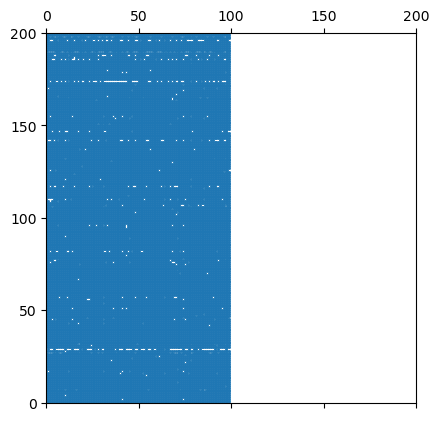

In [ ]:
print(testhash)
print(testhash.shape)
print(type(testhash))
#show that the matrix has 100 columns and 17770 rows as i always forget which is which lol
#meaning columns are the users and rows are the permutations
#the rows typically refer to the first axis (axis 0), and the columns refer to the second axis (axis 1). 

plt.spy(testhash, markersize=1)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

In [ ]:
#print the first colum from the user_movie_matrix, so for the first person
print(user_movie_matrix[0,:])
print(testhash[:,0])

  (0, 94)	1.0
  (0, 154)	1.0
  (0, 440)	1.0
  (0, 574)	1.0
  (0, 852)	1.0
  (0, 1188)	1.0
  (0, 1214)	1.0
  (0, 1263)	1.0
  (0, 1498)	1.0
  (0, 1716)	1.0
  (0, 1717)	1.0
  (0, 1802)	1.0
  (0, 2180)	1.0
  (0, 2325)	1.0
  (0, 2680)	1.0
  (0, 3399)	1.0
  (0, 3669)	1.0
  (0, 3689)	1.0
  (0, 3880)	1.0
  (0, 4755)	1.0
  (0, 4798)	1.0
  (0, 5267)	1.0
  (0, 5690)	1.0
  (0, 5883)	1.0
  (0, 6741)	1.0
  :	:
  (0, 95125)	1.0
  (0, 95685)	1.0
  (0, 95929)	1.0
  (0, 96450)	1.0
  (0, 96500)	1.0
  (0, 96768)	1.0
  (0, 96896)	1.0
  (0, 97743)	1.0
  (0, 98190)	1.0
  (0, 98976)	1.0
  (0, 99285)	1.0
  (0, 99550)	1.0
  (0, 99972)	1.0
  (0, 100323)	1.0
  (0, 100326)	1.0
  (0, 100347)	1.0
  (0, 101095)	1.0
  (0, 101297)	1.0
  (0, 101363)	1.0
  (0, 102016)	1.0
  (0, 102924)	1.0
  (0, 102940)	1.0
  (0, 102994)	1.0
  (0, 103156)	1.0
  (0, 103629)	1.0
[243. 932.  90. ... 180.   6.  52.]


In [28]:
def jaccard_similarity(signature1, signature2):
    return np.sum(signature1 == signature2) / np.sum(signature1 != np.inf)

def lsh(signatures, num_hashes, similarity_threshold):
    num_bands = 50
    band_size = num_hashes // num_bands

    buckets = {}
    for user_id, signature in enumerate(signatures):
        for band in range(num_bands):
            band_hash = tuple(signature[band * band_size:(band + 1) * band_size])
            if band_hash not in buckets:
                buckets[band_hash] = []
            buckets[band_hash].append(user_id)
    
    print(f'Amount of buckets: {len(buckets)}')
    
    candidate_pairs = set()
    for bucket_users in buckets.values():
        for i in range(len(bucket_users)):
            for j in range(i + 1, len(bucket_users)):
                candidate_pairs.add((bucket_users[i], bucket_users[j]))
    
    print(f'Candidate pairs: {len(candidate_pairs)}')
    
    similar_users = []
    for user1, user2 in candidate_pairs:
        if user1 == user2:
            continue
        sim = jaccard_similarity(signatures[user1], signatures[user2])
        if sim >= similarity_threshold:
            similar_users.append((user1, user2))
    
    print(f'Similar users: {len(similar_users)}')
    return similar_users

In [50]:
def hash_with_hashlib(row, num_buckets):
    # Convert row to a string representation
    row_str = ",".join(map(str, row))
    # Hash the string using hashlib
    hash_object = hashlib.sha256(row_str.encode())
    # Convert hash to an integer
    hash_int = int(hash_object.hexdigest(), 16)
    # Map to a bucket
    return hash_int % num_buckets

def LocalSH(signatures, num_bands, num_buckets, similarity_threshold):
    #first we split the matrix into bands , we need to make sure that the number of bands times the number of rows per band is equal to the number of rows in the signature matrix
    if signatures.shape[1] % num_bands != 0:
        raise ValueError("The number of columns must be divisible by m for exact band splitting.")

    bands = np.split(signatures, num_bands, axis=1) #split the signature array along the second axis (colums)
    print(f'# values in each band: {bands[0].shape[1]}')

    #we will use hashlib to get a unique hash for each band

    bucket_table = []
    for band in enumerate(bands):
        buckets = defaultdict(list)

        for i, row in enumerate(band):
            bucket = hash_with_hashlib(band, num_buckets)
            buckets[bucket].append(i)
        bucket_table.append(buckets)
        #this should give us a table with the buckets for each band
    for bucket, rows in bucket_table[0].items():
        print(f'Bucket {bucket}: {rows}')





In [29]:
similar_users = lsh(testhash, 100, 0.5)
print(similar_users)

#todo check what exactly the numbers are, are they the user id's or movie id's or what are they and why are they the same number.
# It could have something to do with the fact that when I ran this code I had not yet transposed the minhash signature,
# so the users and movies were switched.

Amount of buckets: 431504
Candidate pairs: 10847046
Similar users: 14477
[(6407, 12917), (570, 5495), (11336, 12581), (7616, 11282), (9627, 11063), (13922, 15061), (2056, 12955), (7399, 12442), (11676, 12671), (3961, 10946), (3426, 4639), (6195, 7623), (4431, 14312), (3961, 6205), (1743, 1797), (6407, 16138), (5053, 11442), (2781, 15393), (9727, 15393), (8643, 14620), (6036, 14589), (4305, 10169), (6407, 11780), (13922, 16241), (5308, 5836), (7744, 16878), (4305, 12869), (4355, 6036), (3924, 9591), (1961, 11313), (10681, 15728), (3105, 16878), (14666, 17307), (14453, 16878), (606, 12342), (6691, 13727), (8781, 8903), (3623, 16667), (3755, 14690), (12342, 14148), (4305, 13390), (3859, 6832), (5084, 15123), (8599, 13016), (3009, 9822), (6719, 14409), (570, 5400), (6970, 14549), (606, 3105), (6796, 8903), (12316, 16376), (456, 6970), (751, 2039), (456, 14549), (9881, 15106), (5495, 6973), (570, 3604), (3604, 16764), (2861, 13194), (5084, 6407), (2128, 6612), (3937, 16881), (13762, 15061),

In [30]:
print(len(similar_users))

14477


In [52]:
LocalSH(testhash, 20, 100, 0.5)

# values in each band: 5
Bucket 17: [0, 1]
